<a href="https://colab.research.google.com/github/HellBlazer123/Handwritten_Digit_Recog/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
import random
import torch
import torchvision

In [0]:
import torchvision.datasets as ds

In [0]:
mnist_trainset = ds.MNIST(root="./data", train=True, download=True, transform=None)

0it [00:00, ?it/s]

9920512it [00:01, 9489458.46it/s]                            


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 143086.43it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 2323203.21it/s]                           
0it [00:00, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 52170.32it/s]            

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [0]:
mnist_testset = ds.MNIST(root="./data", train=False, download=True, transform=None)

In [0]:
training_data = mnist_trainset.data.view(60000,784)

training_labels_raw = mnist_trainset.targets
training_labels = torch.zeros(len(training_labels_raw),10)
for i in range(len(training_labels_raw)):
  temp = [0]*10
  temp[training_labels_raw[i].item()] = 1
  training_labels[i] = torch.tensor(temp)
  
test_data = mnist_testset.data.view(10000,784)

testing_labels = mnist_testset.targets

In [0]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = torch.nn.Sequential(
    torch.nn.Linear(784,100),
    torch.nn.Sigmoid(),
    torch.nn.Linear(100,10),
    torch.nn.Softmax(dim=1),
)

loss_fn = torch.nn.MSELoss()
lr = 0.15
epochs = 20
batch_size = 100
n_train = training_data.size()[0]
n_test = test_data.size()[0]

print(">>> Starting Training...")

for j in range(epochs):
  permutation = torch.randperm(n_train)
  
  for i in range(0, n_train, batch_size):
    idxs = permutation[i:i+batch_size]
    
    data, labels = training_data[idxs], training_labels[idxs]
    
    y_pred = model(data.float())

    loss = loss_fn(y_pred, labels)

#     print(loss.item())

    model.zero_grad()

    loss.backward()

    with torch.no_grad():
      for param in model.parameters():
        param -= lr*param.grad
  print("Epoch {0}: {1}".format(j,loss.item()))

>>> Starting Training...
Epoch 0: 0.025821154937148094
Epoch 1: 0.01342275831848383
Epoch 2: 0.010291533544659615
Epoch 3: 0.011626007966697216
Epoch 4: 0.012568315491080284
Epoch 5: 0.014015669003129005
Epoch 6: 0.010154626332223415
Epoch 7: 0.01214973907917738
Epoch 8: 0.00976171437650919
Epoch 9: 0.009684392251074314
Epoch 10: 0.012405579909682274
Epoch 11: 0.007942578755319118
Epoch 12: 0.007990934886038303
Epoch 13: 0.009129520505666733
Epoch 14: 0.005458053667098284
Epoch 15: 0.006251947488635778
Epoch 16: 0.0038916626945137978
Epoch 17: 0.0033482417929917574
Epoch 18: 0.003470167052000761
Epoch 19: 0.006825131829828024


In [0]:
y_pred = model(test_data.float())
count = 0
for i in range(10000):
  max_elem, idx = torch.max(y_pred[i], 0)
  if(idx == testing_labels[i]):
    count += 1
count/10000

0.9509

tensor(9)
tensor(9)


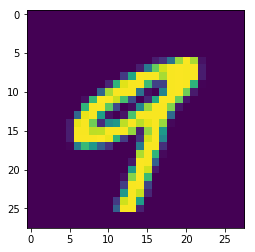

In [0]:
m = 9945

image = test_data[m].view(28,28)
plt.imshow(image)

print(testing_labels[m])

max_elem, idx = torch.max(y_pred[m], 0)
print(idx)

tensor(1)

tensor([2.2542e-04, 9.6364e-01, 1.0113e-03, 7.5179e-03, 6.5439e-04, 8.2339e-03,
        3.1332e-03, 7.6153e-04, 1.3611e-02, 1.2129e-03],
       grad_fn=<SelectBackward>)

tensor(1)
